## Import necessary libraries
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, max_error
!pip install yellowbrick
from yellowbrick.regressor import ResidualsPlot, residuals_plot, prediction_error

## Data preprocessing
---

In [ ]:
# Read the CSV file into a DataFrame
data = pd.read_csv(r"C:\Users\rm8l\Documents\data\Therapy riser dose rates.csv")

# Encode the 'WKDY' column using LabelEncoder
encoder = LabelEncoder()
data['WKDY'] = encoder.fit_transform(data['WKDY'])

# Split the data into features (X) and labels (y)
X = data.drop(["1F dose rate"], 1)
y = data["1F dose rate"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Scale the features using RobustScaler
X_sc = RobustScaler()
X_train = pd.DataFrame(X_sc.fit_transform(X_train))
X_test = pd.DataFrame(X_sc.transform(X_test))

# Initialize dictionaries for model and fit comparison
model_comp = {}
fit_comp = {}

## Train Linear Regressor
---

RMSE = 1.1865885402622147
MAE = 0.9735327369060731
MAPE = 0.39016994515300896
Max error = 3.90421899126416



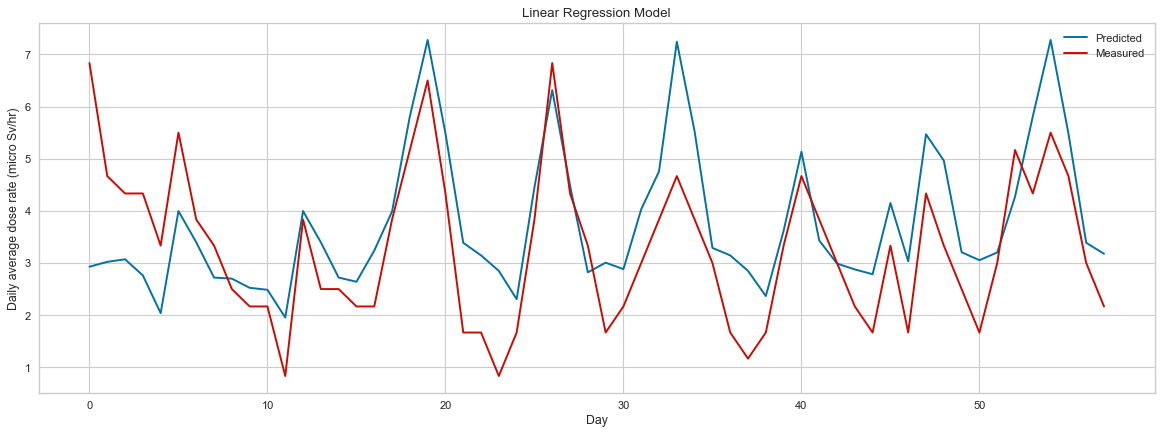

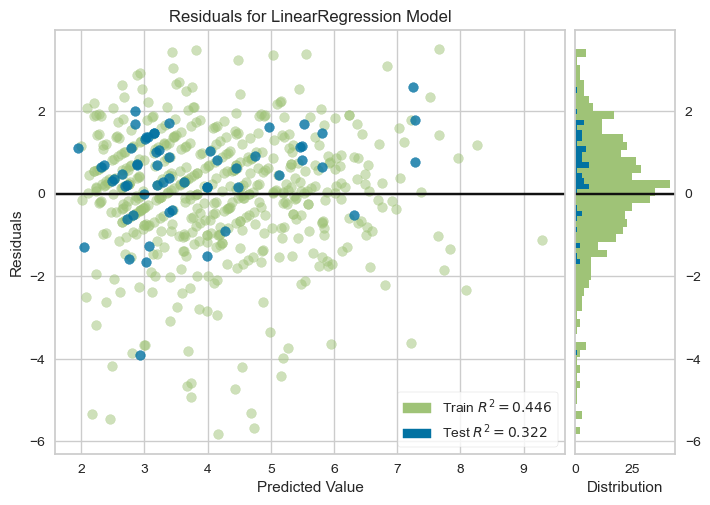

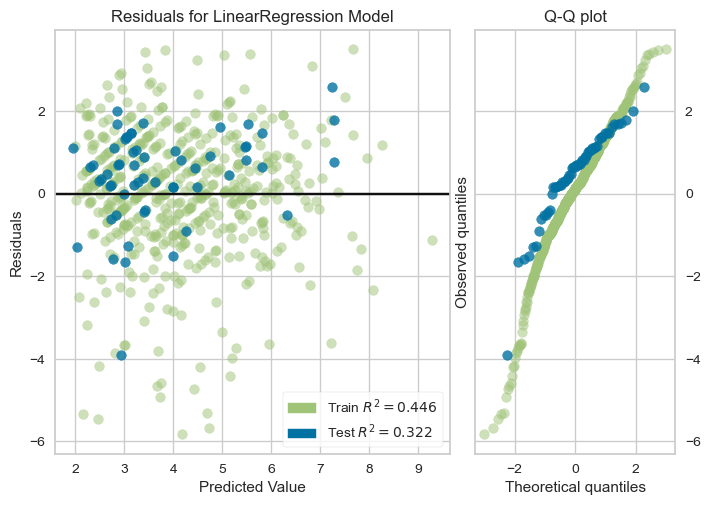

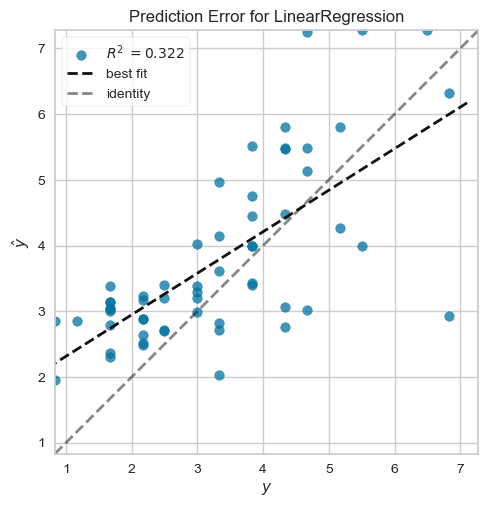

In [4]:
# Import the LinearRegression class from the sklearn.linear_model module
from sklearn.linear_model import LinearRegression

# Create an instance of LinearRegression and assign it to the variable LR
LR = LinearRegression()

# Fit the model on the training data
LR.fit(X_train, y_train)

# Make predictions on the test data
y_pred_LR = LR.predict(X_test)

# Calculate evaluation metrics: RMSE, MAE, MAPE, Max error
LR_RMSE = np.math.sqrt(mean_squared_error(y_test, y_pred_LR))
LR_MAE = mean_absolute_error(y_test, y_pred_LR)
LR_MAPE = mean_absolute_percentage_error(y_test, y_pred_LR)
LR_ME = max_error(y_test, y_pred_LR)

# Print the evaluation metrics
print("RMSE = " + str(LR_RMSE))
print("MAE = " + str(LR_MAE))
print("MAPE = " + str(LR_MAPE))
print("Max error = " + str(LR_ME))
print("")

# Create a figure for plotting the predicted and measured values
figure(figsize=(18, 6), dpi=80)
plt.title(label="Linear Regression Model")
plt.xlabel("Day")
plt.ylabel("Daily average dose rate (micro Sv/hr)")
plt.plot(range(0, y_pred_LR.size), y_pred_LR, color='b', label="Predicted")
plt.plot(range(0, y_test.size), y_test, color='r', label="Measured")
plt.legend(loc="upper right")
plt.show()
print("")

# Create a residual plot for the LinearRegression model
LR_res_plt = ResidualsPlot(LR, train_alpha=0.5, test_alpha=0.8, train_color="g", test_color="b", is_fitted=True)
LR_res_plt.fit(X_train, y_train)
LR_res_plt.score(X_test, y_test)
LR_res_plt.show()
LR_train_r2score = LR_res_plt.train_score_
LR_test_r2score = LR_res_plt.test_score_
LR_r2score_diff = LR_train_r2score - LR_test_r2score

print("")

# Create a QQ plot for the LinearRegression model
LR_QQ_plt = ResidualsPlot(LR, train_alpha=0.5, test_alpha=0.8, train_color="g", test_color="b", is_fitted=True, hist=False, qqplot=True)
LR_QQ_plt.fit(X_train, y_train)
LR_QQ_plt.score(X_test, y_test)
LR_QQ_plt.show()

print("")

# Create a prediction error plot for the LinearRegression model
LR_error_plt = prediction_error(LR, X_train, y_train, X_test, y_test, is_fitted=True)

# Store the train R2 score, test R2 score, and the difference between them 
# in the fit_comp dictionary
fit_comp['LR'] = [LR_train_r2score, LR_test_r2score, LR_r2score_diff]

# Store the RMSE, MAE, MAPE, and max error in the model_comp dictionary
model_comp['LR'] = [LR_RMSE, LR_MAE, LR_MAPE, LR_ME]

## Train K Neaerest Neighbour regressor
---

RMSE = 1.3171267200647714
MAE = 1.0181034482
MAPE = 0.45177148910507886
Max error = 4.0833333332



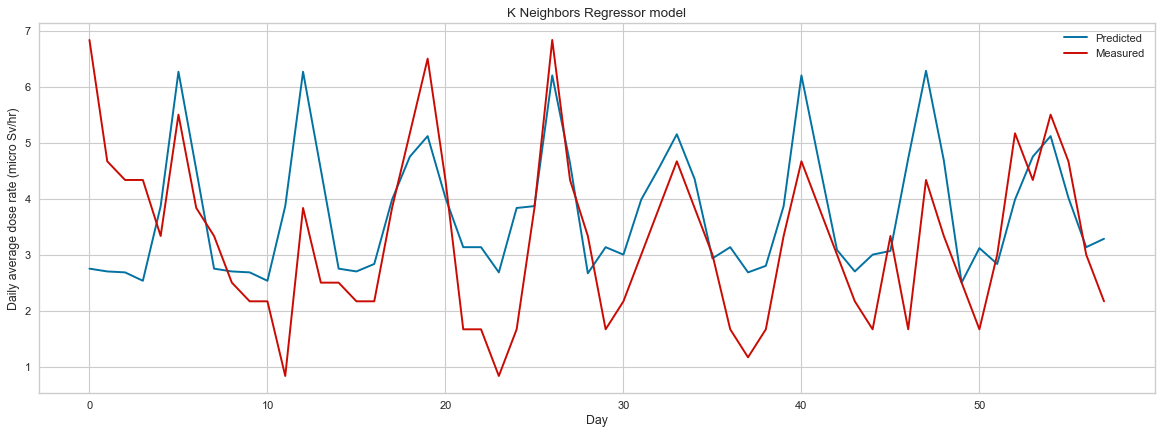

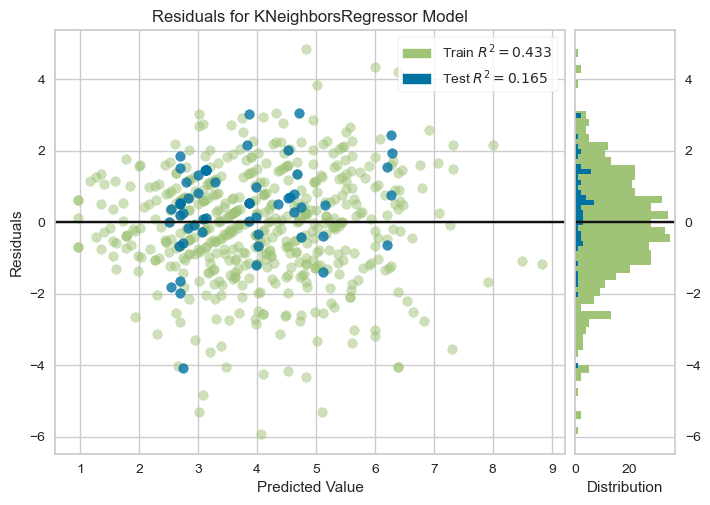

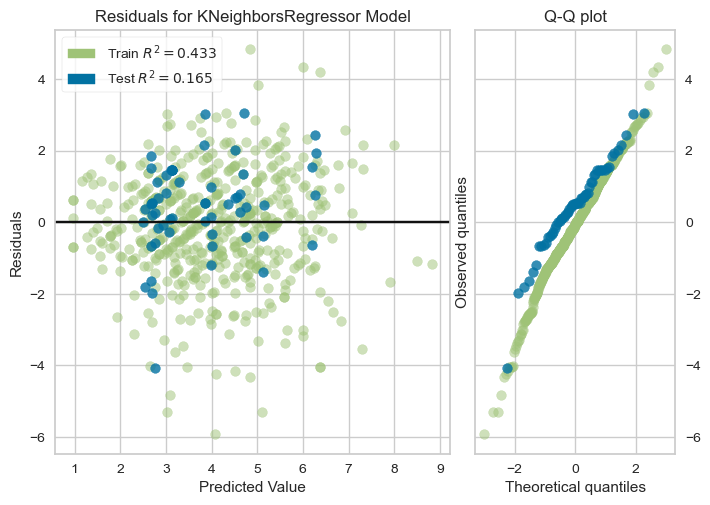

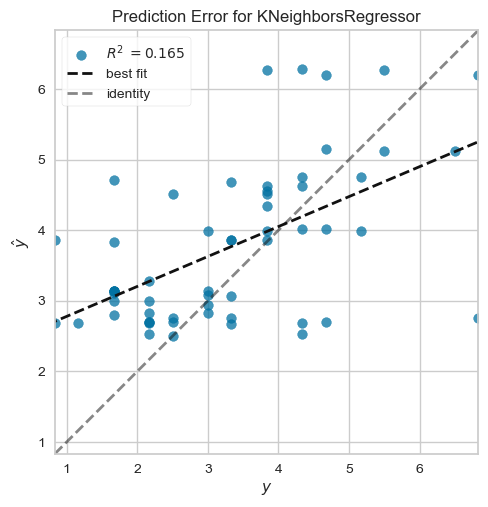

In [5]:
# Import the KNeighborsRegressor class from the sklearn.neighbors module
from sklearn.neighbors import KNeighborsRegressor

# Create an instance of KNeighborsRegressor and assign it to the variable KNN
KNN = KNeighborsRegressor()

# Fit the model on the training data
KNN.fit(X_train, y_train)

# Make predictions on the test data
y_pred_KNN = KNN.predict(X_test)

# Calculate evaluation metrics: RMSE, MAE, MAPE, Max error
KNN_RMSE = np.math.sqrt(mean_squared_error(y_test, y_pred_KNN))
KNN_MAE = mean_absolute_error(y_test, y_pred_KNN)
KNN_MAPE = mean_absolute_percentage_error(y_test, y_pred_KNN)
KNN_ME = max_error(y_test, y_pred_KNN)

# Print the evaluation metrics
print("RMSE = " + str(KNN_RMSE))
print("MAE = " + str(KNN_MAE))
print("MAPE = " + str(KNN_MAPE))
print("Max error = " + str(KNN_ME))
print("")

# Create a figure for plotting the predicted and measured values
figure(figsize=(18, 6), dpi=80)
plt.title(label="K Neighbors Regressor model")
plt.xlabel("Day")
plt.ylabel("Daily average dose rate (micro Sv/hr)")
plt.plot(range(0,y_pred_KNN.size), y_pred_KNN, color='b', label="Predicted") 
plt.plot(range(0,y_test.size), y_test, color='r', label="Measured")
plt.legend(loc="upper right")
plt.show()
print("")

# Create a residual plot for the model
KNN_res_plt = ResidualsPlot(KNN, train_alpha=0.5, test_alpha=0.8, 
                         train_color="g", test_color="b", is_fitted =True)
KNN_res_plt.fit(X_train, y_train)
KNN_res_plt.score(X_test, y_test)
KNN_res_plt.show()
KNN_train_r2score = KNN_res_plt.train_score_
KNN_test_r2score = KNN_res_plt.test_score_
KNN_r2score_diff = KNN_train_r2score-KNN_test_r2score

print("")

# Create a QQ plot for the model
KNN_QQ_plt = ResidualsPlot(KNN, train_alpha=0.5, test_alpha=0.8, 
                         train_color="g", test_color="b", is_fitted =True, hist=False, qqplot=True)
KNN_QQ_plt.fit(X_train, y_train)
KNN_QQ_plt.score(X_test, y_test)
KNN_QQ_plt.show()

print("")

# Create a prediction error plot for the model
KNN_error_plt = prediction_error(KNN, X_train, y_train, X_test, y_test, is_fitted =True)

# Store the train R2 score, test R2 score, and the difference between them 
# in the fit_comp dictionary
fit_comp['KNN']=[KNN_train_r2score, KNN_test_r2score, KNN_r2score_diff]

# Store the RMSE, MAE, MAPE, and max error in the model_comp dictionary
model_comp['KNN']=[KNN_RMSE, KNN_MAE, KNN_MAPE, KNN_ME]

## Train Decision Tree Regressor
---

RMSE = 1.8975209849498111
MAE = 1.5244699763646268
MAPE = 0.5892396900542846
Max error = 4.333333333



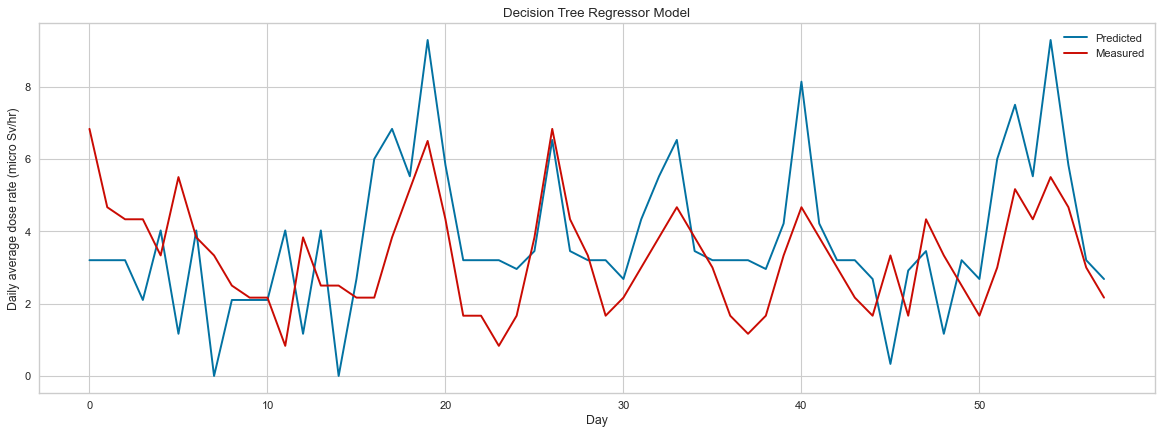

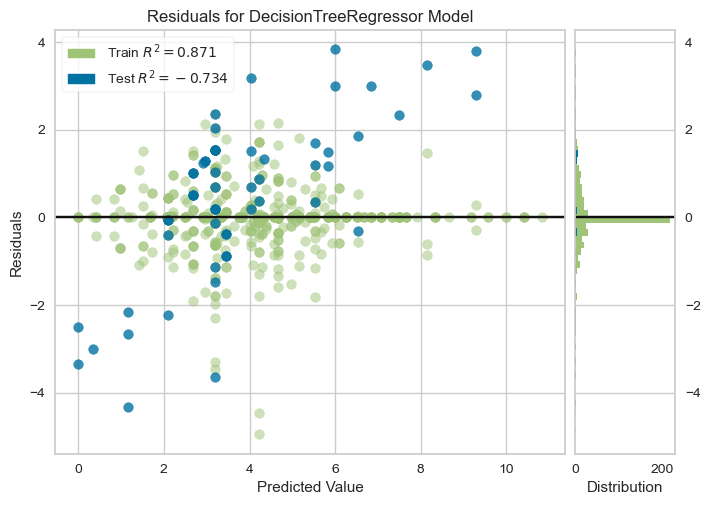

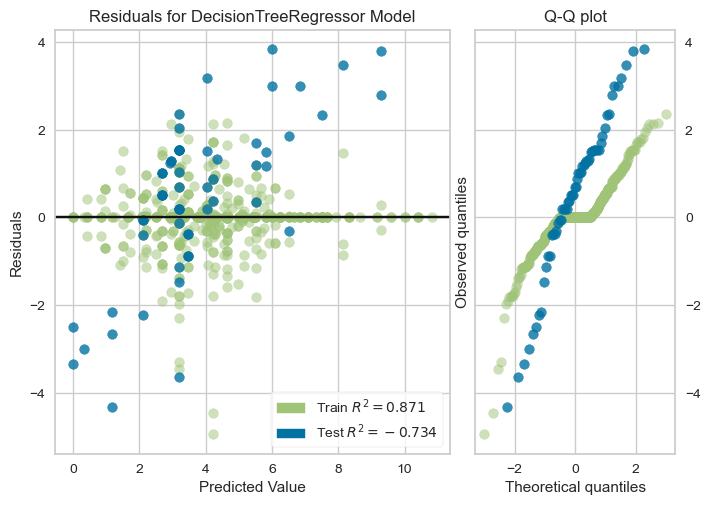

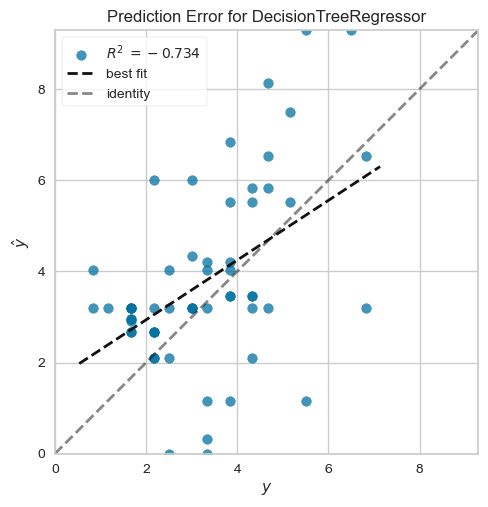

In [6]:
# Import the required library
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor object with specified parameters
DT = DecisionTreeRegressor(max_depth=10, random_state=0)

# Fit the model on the training data
DT.fit(X_train, y_train)

# Make predictions on the test data
y_pred_DT = DT.predict(X_test)

# Calculate evaluation metrics: RMSE, MAE, MAPE, Max error
DT_RMSE = np.math.sqrt(mean_squared_error(y_test, y_pred_DT))
DT_MAE = mean_absolute_error(y_test, y_pred_DT)
DT_MAPE = mean_absolute_percentage_error(y_test, y_pred_DT)
DT_ME = max_error(y_test, y_pred_DT)

# Print the evaluation metrics
print("RMSE =", DT_RMSE)
print("MAE =", DT_MAE)
print("MAPE =", DT_MAPE)
print("Max error =", DT_ME)
print("")

# Create a figure with specified size and DPI
figure(figsize=(18, 6), dpi=80)

# Set the title and labels for the plot
plt.title(label="Decision Tree Regressor Model")
plt.xlabel("Day")
plt.ylabel("Daily average dose rate (micro Sv/hr)")

# Plot the predicted values and measured values
plt.plot(range(0, y_pred_DT.size), y_pred_DT, color='b', label="Predicted")
plt.plot(range(0, y_test.size), y_test, color='r', label="Measured")

# Add a legend to the plot
plt.legend(loc="upper right")

# Display the plot
plt.show()
print("")

# Create a ResidualsPlot object for Decision Tree
DT_res_plt = ResidualsPlot(DT, train_alpha=0.5, test_alpha=0.8, 
                           train_color="g", test_color="b", is_fitted=True)

# Fit the ResidualsPlot object on the training data
DT_res_plt.fit(X_train, y_train)

# Calculate the R-squared score on the test data
DT_res_plt.score(X_test, y_test)

# Show the ResidualsPlot
DT_res_plt.show()

# Retrieve the R-squared scores for training and test data
DT_train_r2score = DT_res_plt.train_score_
DT_test_r2score = DT_res_plt.test_score_
DT_r2score_diff = DT_train_r2score - DT_test_r2score

print("")

# Create a ResidualsPlot object for Decision Tree with QQ plot
DT_QQ_plt = ResidualsPlot(DT, train_alpha=0.5, test_alpha=0.8, 
                          train_color="g", test_color="b", is_fitted=True, hist=False, qqplot=True)

# Fit the ResidualsPlot object on the training data
DT_QQ_plt.fit(X_train, y_train)

# Calculate the R-squared score on the test data
DT_QQ_plt.score(X_test, y_test)

# Show the ResidualsPlot with QQ plot
DT_QQ_plt.show()

print("")

# Create a prediction error plot for Decision Tree
DT_error_plt = prediction_error(DT, X_train, y_train, X_test, y_test, is_fitted=True)

# Update the fit_comp dictionary with R-squared scores
fit_comp['DT'] = [DT_train_r2score, DT_test_r2score, DT_r2score_diff]

# Update the model_comp dictionary with evaluation metrics
model_comp['DT'] = [DT_RMSE, DT_MAE, DT_MAPE, DT_ME]


## Train Random Forest Regressor
---

RMSE = 1.3116416236916526
MAE = 1.0748473918825334
MAPE = 0.44704552370717326
Max error = 3.8243686320618



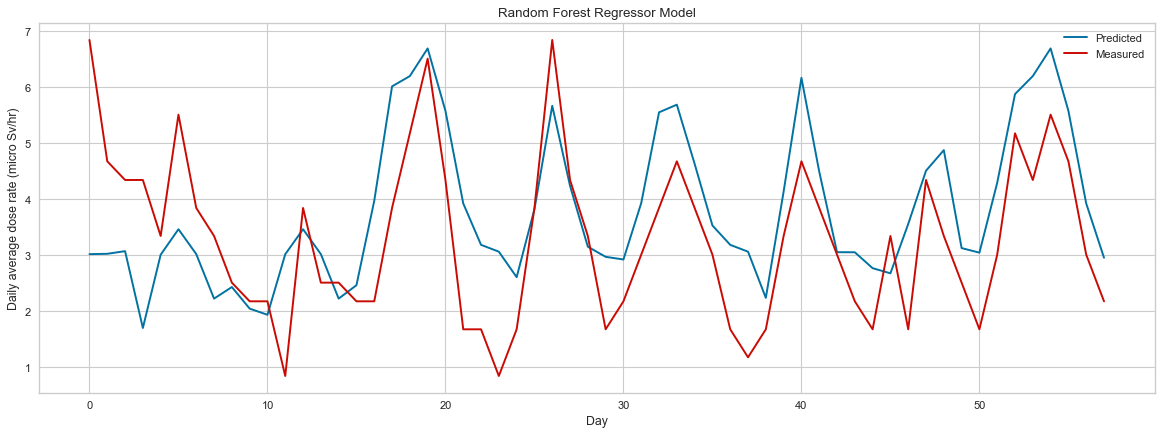

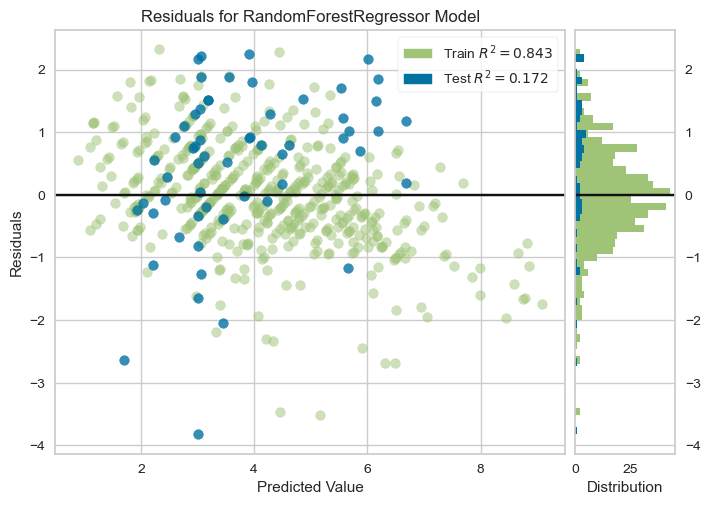

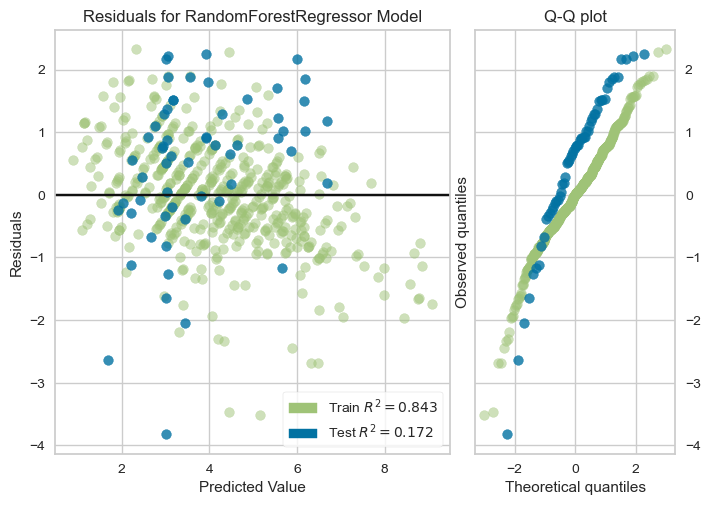

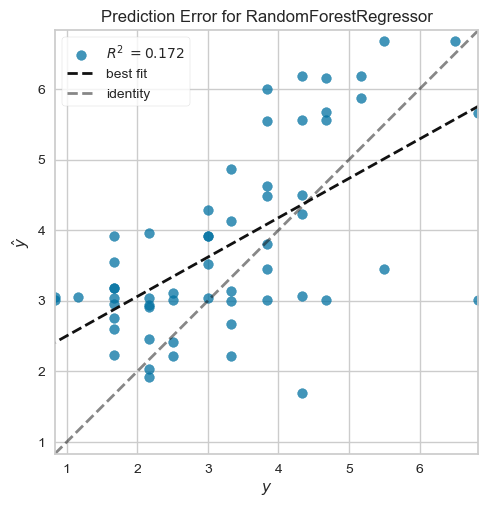

In [7]:
# Import the required library
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor object with specified parameters
RF = RandomForestRegressor(max_depth=10, random_state=0)

# Fit the model on the training data
RF.fit(X_train, y_train)

# Make predictions on the test data
y_pred_RF = RF.predict(X_test)

# Calculate evaluation metrics: RMSE, MAE, MAPE, Max error
RF_RMSE = np.math.sqrt(mean_squared_error(y_test, y_pred_RF))
RF_MAE = mean_absolute_error(y_test, y_pred_RF)
RF_MAPE = mean_absolute_percentage_error(y_test, y_pred_RF)
RF_ME = max_error(y_test, y_pred_RF)

# Print the evaluation metrics
print("RMSE =", RF_RMSE)
print("MAE =", RF_MAE)
print("MAPE =", RF_MAPE)
print("Max error =", RF_ME)
print("")

# Create a figure with specified size and DPI
figure(figsize=(18, 6), dpi=80)

# Set the title and labels for the plot
plt.title(label="Random Forest Regressor Model")
plt.xlabel("Day")
plt.ylabel("Daily average dose rate (micro Sv/hr)")

# Plot the predicted values and measured values
plt.plot(range(0, y_pred_RF.size), y_pred_RF, color='b', label="Predicted")
plt.plot(range(0, y_test.size), y_test, color='r', label="Measured")

# Add a legend to the plot
plt.legend(loc="upper right")

# Display the plot
plt.show()
print("")

# Create a ResidualsPlot object for Random Forest
RF_res_plt = ResidualsPlot(RF, train_alpha=0.5, test_alpha=0.8, 
                           train_color="g", test_color="b", is_fitted=True)

# Fit the ResidualsPlot object on the training data
RF_res_plt.fit(X_train, y_train)

# Calculate the R-squared score on the test data
RF_res_plt.score(X_test, y_test)

# Show the ResidualsPlot
RF_res_plt.show()

# Retrieve the R-squared scores for training and test data
RF_train_r2score = RF_res_plt.train_score_
RF_test_r2score = RF_res_plt.test_score_
RF_r2score_diff = RF_train_r2score - RF_test_r2score

print("")

# Create a ResidualsPlot object for Random Forest with QQ plot
RF_QQ_plt = ResidualsPlot(RF, train_alpha=0.5, test_alpha=0.8, 
                          train_color="g", test_color="b", is_fitted=True, hist=False, qqplot=True)

# Fit the ResidualsPlot object on the training data
RF_QQ_plt.fit(X_train, y_train)

# Calculate the R-squared score on the test data
RF_QQ_plt.score(X_test, y_test)

# Show the ResidualsPlot with QQ plot
RF_QQ_plt.show()

print("")

# Create a prediction error plot for Random Forest
RF_error_plt = prediction_error(RF, X_train, y_train, X_test, y_test, is_fitted=True)

# Update the fit_comp dictionary with R-squared scores
fit_comp['RF'] = [RF_train_r2score, RF_test_r2score, RF_r2score_diff]

# Update the model_comp dictionary with evaluation metrics
model_comp['RF'] = [RF_RMSE, RF_MAE, RF_MAPE, RF_ME]


## Train Gradient Boosting Regressor
---

RMSE = 1.1058333050844324
MAE = 0.8735164862763847
MAPE = 0.35527092389062936
Max error = 3.2659676644580236



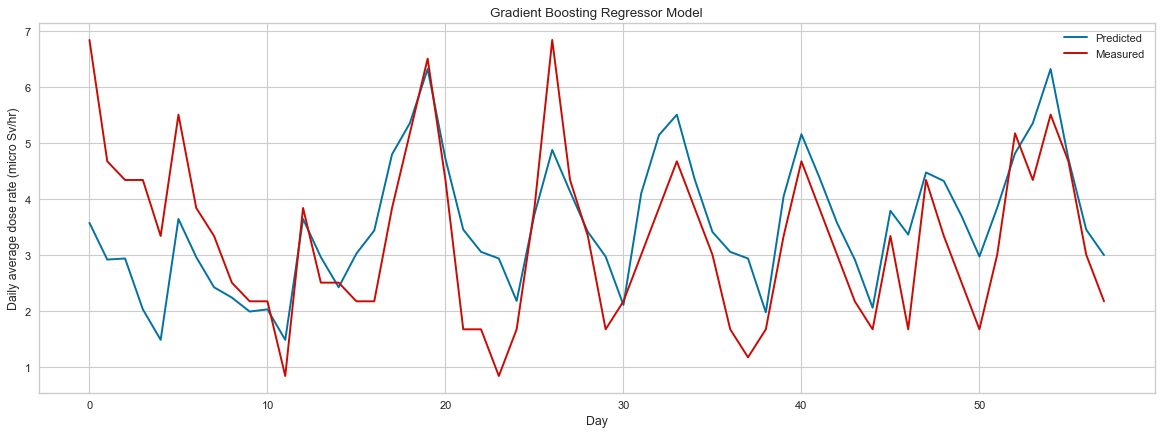

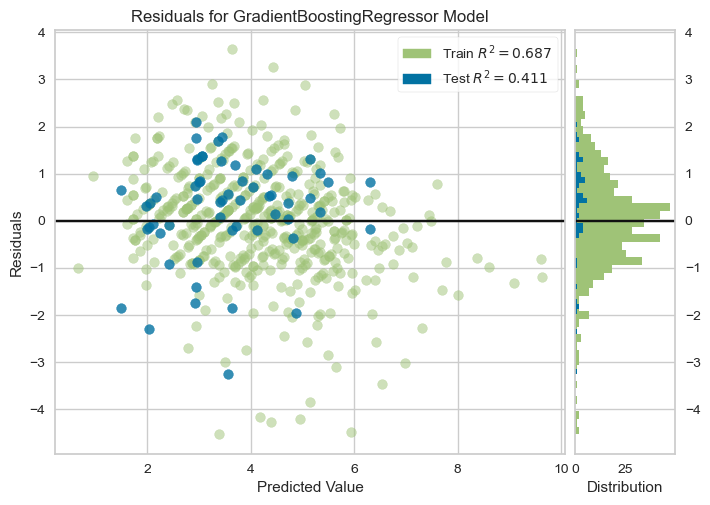

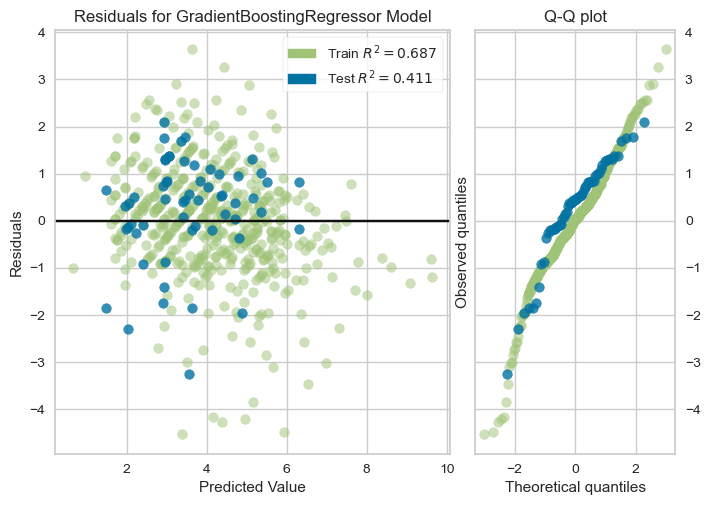

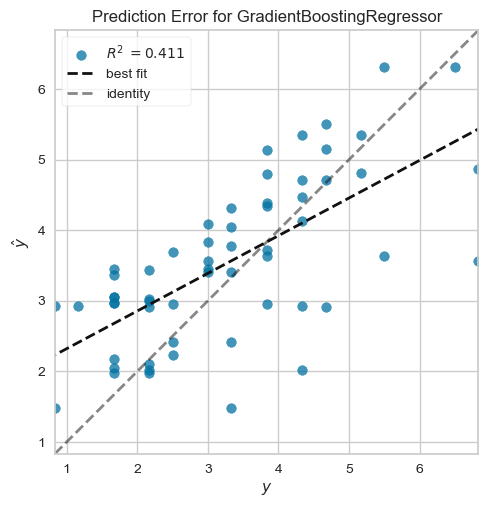

In [8]:
# Import the required library
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor object with specified parameters
GBR = GradientBoostingRegressor(n_iter_no_change=10, random_state=0)

# Fit the model on the training data
GBR.fit(X_train, y_train)

# Make predictions on the test data
y_pred_GBR = GBR.predict(X_test)

# Calculate evaluation metrics: RMSE, MAE, MAPE, Max error
GBR_RMSE = np.math.sqrt(mean_squared_error(y_test, y_pred_GBR))
GBR_MAE = mean_absolute_error(y_test, y_pred_GBR)
GBR_MAPE = mean_absolute_percentage_error(y_test, y_pred_GBR)
GBR_ME = max_error(y_test, y_pred_GBR)

# Print the evaluation metrics
print("RMSE =", GBR_RMSE)
print("MAE =", GBR_MAE)
print("MAPE =", GBR_MAPE)
print("Max error =", GBR_ME)
print("")

# Create a figure with specified size and DPI
figure(figsize=(18, 6), dpi=80)

# Set the title and labels for the plot
plt.title(label="Gradient Boosting Regressor Model")
plt.xlabel("Day")
plt.ylabel("Daily average dose rate (micro Sv/hr)")

# Plot the predicted values and measured values
plt.plot(range(0, y_pred_GBR.size), y_pred_GBR, color='b', label="Predicted")
plt.plot(range(0, y_test.size), y_test, color='r', label="Measured")

# Add a legend to the plot
plt.legend(loc="upper right")

# Display the plot
plt.show()
print("")

# Create a ResidualsPlot object for Gradient Boosting Regressor
GBR_res_plt = ResidualsPlot(GBR, train_alpha=0.5, test_alpha=0.8, 
                            train_color="g", test_color="b", is_fitted=True)

# Fit the ResidualsPlot object on the training data
GBR_res_plt.fit(X_train, y_train)

# Calculate the R-squared score on the test data
GBR_res_plt.score(X_test, y_test)

# Show the ResidualsPlot
GBR_res_plt.show()

# Retrieve the R-squared scores for training and test data
GBR_train_r2score = GBR_res_plt.train_score_
GBR_test_r2score = GBR_res_plt.test_score_
GBR_r2score_diff = GBR_train_r2score - GBR_test_r2score

print("")

# Create a ResidualsPlot object for Gradient Boosting Regressor with QQ plot
GBR_QQ_plt = ResidualsPlot(GBR, train_alpha=0.5, test_alpha=0.8, 
                           train_color="g", test_color="b", is_fitted=True, hist=False, qqplot=True)

# Fit the ResidualsPlot object on the training data
GBR_QQ_plt.fit(X_train, y_train)

# Calculate the R-squared score on the test data
GBR_QQ_plt.score(X_test, y_test)

# Show the ResidualsPlot with QQ plot
GBR_QQ_plt.show()

print("")

# Create a prediction error plot for Gradient Boosting Regressor
GBR_error_plt = prediction_error(GBR, X_train, y_train, X_test, y_test, is_fitted=True)

# Update the fit_comp dictionary with R-squared scores
fit_comp['GBR']=[GBR_train_r2score, GBR_test_r2score, GBR_r2score_diff]

# Update the model_comp dictionary with evaluation metrics
model_comp['GBR']=[GBR_RMSE, GBR_MAE, GBR_MAPE, GBR_ME]

## Train Support Vector Machine Regressor
---

RMSE = 1.2598824482946516
MAE = 1.0075318751313285
MAPE = 0.4817529095716803
Max error = 3.449774017197991



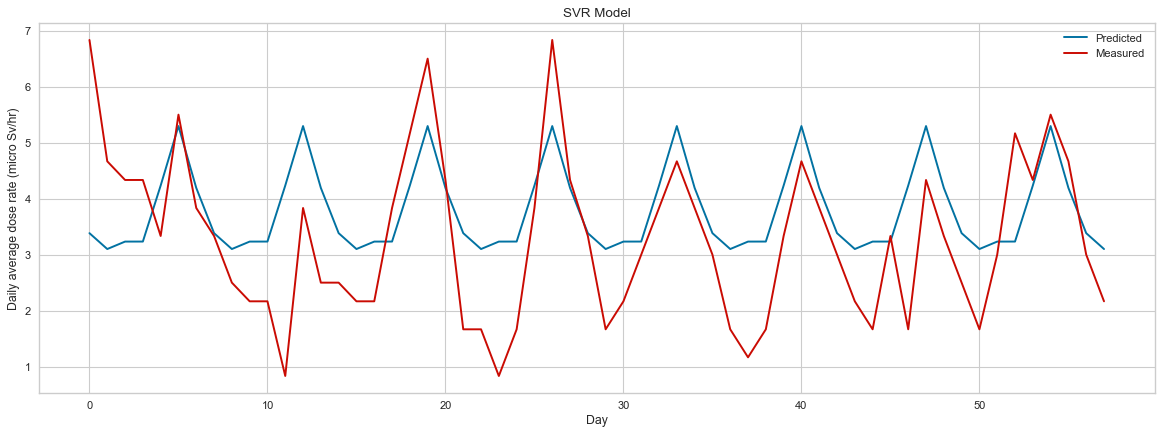

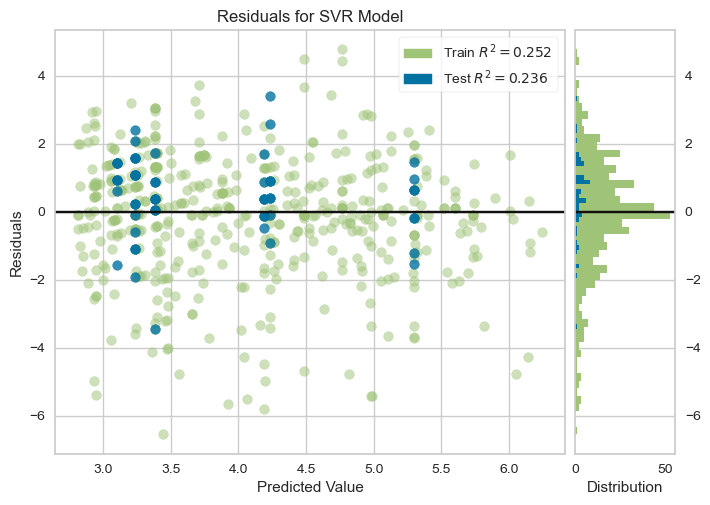

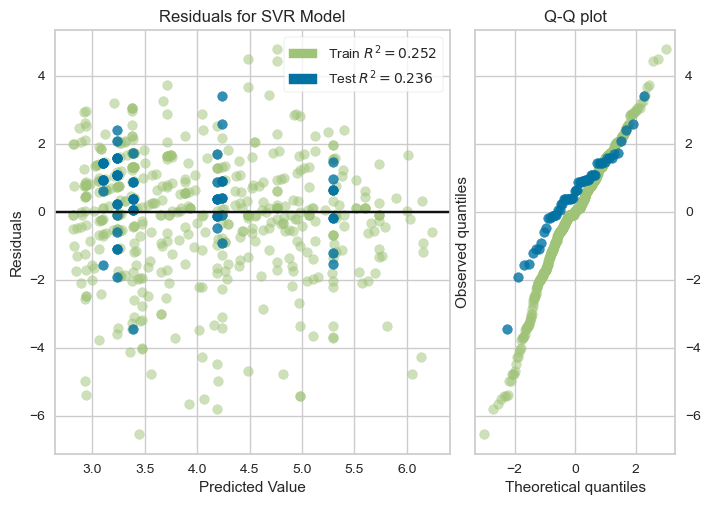

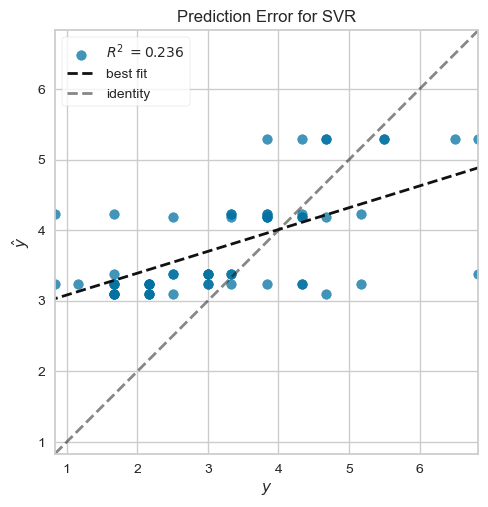

In [9]:
# Import the required library
from sklearn.svm import SVR

# Create an SVR model object
SVR_model = SVR()

# Fit the SVR model on the training data
SVR_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_SVR = SVR_model.predict(X_test)

# Calculate evaluation metrics: RMSE, MAE, MAPE, Max error
SVR_RMSE = np.math.sqrt(mean_squared_error(y_test, y_pred_SVR))
SVR_MAE = mean_absolute_error(y_test, y_pred_SVR)
SVR_MAPE = mean_absolute_percentage_error(y_test, y_pred_SVR)
SVR_ME = max_error(y_test, y_pred_SVR)

# Print the evaluation metrics
print("RMSE =", SVR_RMSE)
print("MAE =", SVR_MAE)
print("MAPE =", SVR_MAPE)
print("Max error =", SVR_ME)
print("")

# Create a figure with specified size and DPI
figure(figsize=(18, 6), dpi=80)

# Set the title and labels for the plot
plt.title(label="SVR Model")
plt.xlabel("Day")
plt.ylabel("Daily average dose rate (micro Sv/hr)")

# Plot the predicted values and measured values
plt.plot(range(0, y_pred_SVR.size), y_pred_SVR, color='b', label="Predicted")
plt.plot(range(0, y_test.size), y_test, color='r', label="Measured")

# Add a legend to the plot
plt.legend(loc="upper right")

# Display the plot
plt.show()
print("")

# Create a ResidualsPlot object for SVR
SVR_res_plt = ResidualsPlot(SVR_model, train_alpha=0.5, test_alpha=0.8, 
                            train_color="g", test_color="b", is_fitted=True)

# Fit the ResidualsPlot object on the training data
SVR_res_plt.fit(X_train, y_train)

# Calculate the R-squared score on the test data
SVR_res_plt.score(X_test, y_test)

# Show the ResidualsPlot
SVR_res_plt.show()

# Retrieve the R-squared scores for training and test data
SVR_train_r2score = SVR_res_plt.train_score_
SVR_test_r2score = SVR_res_plt.test_score_
SVR_r2score_diff = SVR_train_r2score - SVR_test_r2score

print("")

# Create a ResidualsPlot object for SVR with QQ plot
SVR_QQ_plt = ResidualsPlot(SVR_model, train_alpha=0.5, test_alpha=0.8, 
                           train_color="g", test_color="b", is_fitted=True, hist=False, qqplot=True)

# Fit the ResidualsPlot object on the training data
SVR_QQ_plt.fit(X_train, y_train)

# Calculate the R-squared score on the test data
SVR_QQ_plt.score(X_test, y_test)

# Show the ResidualsPlot with QQ plot
SVR_QQ_plt.show()

print("")

# Create a prediction error plot for SVR
SVR_error_plt = prediction_error(SVR_model, X_train, y_train, X_test, y_test, is_fitted=True)

# Update the fit_comp dictionary with R-squared scores
fit_comp['SVR'] = [SVR_train_r2score, SVR_test_r2score, SVR_r2score_diff]

# Update the model_comp dictionary with evaluation metrics
model_comp['SVR']=[SVR_RMSE, SVR_MAE, SVR_MAPE, SVR_ME]


## Create Table of Errors
---

In [10]:
# Convert the model_comp dictionary to a DataFrame
model_comp = pd.DataFrame.from_dict(model_comp).T

# Set the column names of the DataFrame
model_comp.columns = ['RMSE', 'MAE', 'MAPE', 'Max error']

# Sort the DataFrame based on the 'MAPE' column in ascending order
model_comp = model_comp.sort_values('MAPE', ascending=True)

# Round the values in the DataFrame to 3 decimal places
# Apply a background gradient to the rounded DataFrame using the 'Blues' colormap
(model_comp.round(3)).style.background_gradient(cmap='Blues')

,RMSE,MAE,MAPE,Max error
GBR,1.106000,0.874000,0.355000,3.266000
LR,1.187000,0.974000,0.390000,3.904000
RF,1.312000,1.075000,0.447000,3.824000
KNN,1.317000,1.018000,0.452000,4.083000
SVR,1.260000,1.008000,0.482000,3.450000
DT,1.898000,1.524000,0.589000,4.333000


## Create Table of r<sup>2</sup> values
---

In [11]:
# Convert the fit_comp dictionary to a DataFrame
fit_comp = pd.DataFrame.from_dict(fit_comp).T

# Set the column names of the DataFrame
fit_comp.columns = ['train r2', 'test r2', 'r2 diff']

# Sort the DataFrame based on the 'test r2' column in descending order
fit_comp = fit_comp.sort_values('test r2', ascending=False)

# Apply a background gradient to the DataFrame using the 'Blues' colormap
# Display the styled DataFrame
fit_comp.style.background_gradient(cmap='Blues')

,train r2,test r2,r2 diff
GBR,0.687166,0.411213,0.275954
LR,0.446188,0.322079,0.124110
SVR,0.252031,0.235744,0.016288
RF,0.843133,0.171658,0.671475
KNN,0.433458,0.164716,0.268742
DT,0.870614,-0.733613,1.604228


## Produce Regression plots of predictions
---

C:\Users\rm8l\AppData\Local\Temp\4\ipykernel_7576\88202876.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0, 7], [0, 7], 'k--', color='r')


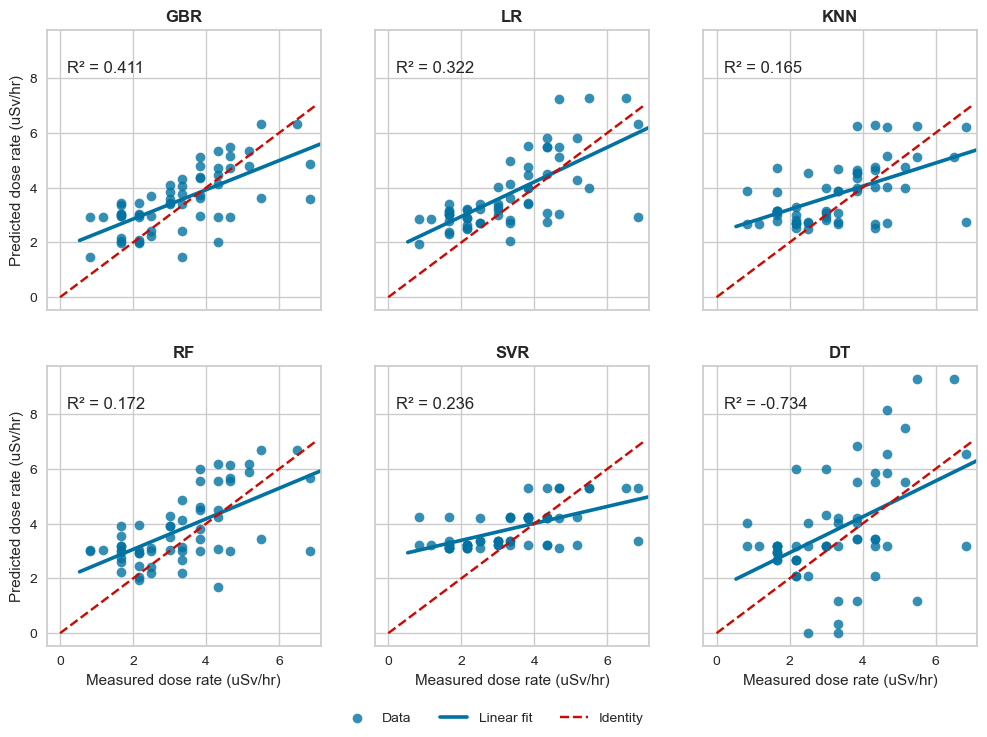

In [12]:
# Create a figure with subplots arranged in a 2x3 grid and set the size
fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)

# Plot a scatter plot with a linear regression line for GBR
sns.regplot(x=y_test, y=y_pred_GBR, ax=axs[0, 0], ci=None, truncate=False)
axs[0, 0].set_title('GBR', fontweight="bold")
axs[0, 0].text(0.2, 8.2, f'R² = {GBR_test_r2score:,.3f}')

# Plot a scatter plot with a linear regression line for LR
sns.regplot(x=y_test, y=y_pred_LR, ax=axs[0, 1], ci=None, truncate=False)
axs[0, 1].set_title('LR', fontweight="bold")
axs[0, 1].text(0.2, 8.2, f'R² = {LR_test_r2score:,.3f}')

# Plot a scatter plot with a linear regression line for KNN
sns.regplot(x=y_test, y=y_pred_KNN, ax=axs[0, 2], ci=None, truncate=False)
axs[0, 2].set_title('KNN', fontweight="bold")
axs[0, 2].text(0.2, 8.2, f'R² = {KNN_test_r2score:,.3f}')

# Plot a scatter plot with a linear regression line for RF
sns.regplot(x=y_test, y=y_pred_RF, ax=axs[1, 0], ci=None, truncate=False)
axs[1, 0].set_title('RF', fontweight="bold")
axs[1, 0].text(0.2, 8.2, f'R² = {RF_test_r2score:,.3f}')

# Plot a scatter plot with a linear regression line for SVR
sns.regplot(x=y_test, y=y_pred_SVR, ax=axs[1, 1], ci=None, truncate=False)
axs[1, 1].set_title('SVR', fontweight="bold")
axs[1, 1].text(0.2, 8.2, f'R² = {SVR_test_r2score:,.3f}')

# Plot a scatter plot with a linear regression line for DT
sns.regplot(x=y_test, y=y_pred_DT, ax=axs[1, 2], ci=None, truncate=False)
axs[1, 2].set_title('DT', fontweight="bold")
axs[1, 2].text(0.2, 8.2, f'R² = {DT_test_r2score:,.3f}')

# Set the x-label and y-label for all subplots
# Plot a diagonal line for identity reference
for ax in axs.flat:
    ax.set(xlabel='Measured dose rate (uSv/hr)', ylabel='Predicted dose rate (uSv/hr)')
    ax.plot([0, 7], [0, 7], 'k--', color='r')
    ax.label_outer()

# Create a legend for the figure
fig.legend(labels=["Data", "Linear fit", "Identity"], loc="lower center", ncol=3)
